In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

1. Загрузить данные из папки Data Folder

In [106]:
col_names = ['country', 'landmass', 'zone', 'area', 'population', 'languag', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'dominantcolour', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'traingle', 'icon', 'animate', 'text', 'topleftcolour', 'botrightcolor']

In [107]:
data = pd.read_csv('flag_data.scv')
data.columns = col_names

2. Провести описательный анализ предложенных данных

In [108]:
data.head().T

,0,1,2,3,4
country,Albania,Algeria,American-Samoa,Andorra,Angola
landmass,3,4,6,3,4
zone,1,1,3,1,2
area,29,2388,0,0,1247
population,3,20,0,0,7
languag,6,8,1,6,10
religion,6,2,1,0,5
bars,0,2,0,3,0
stripes,0,0,0,0,2
colours,3,3,5,3,3


In [109]:
# country не очень полезна для задачи, т.к нет повторяющихся
data = data.drop('country', axis = 1)

3. Предложить стратегию по работе с категориальными переменными 

In [110]:
# большинство категориальных признаков зашифрованы, посмотрим, что осталось не обработанным
сategorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
сategorical_columns

['dominantcolour', 'topleftcolour', 'botrightcolor']

In [111]:
# обработаем их через get dummies
for x in сategorical_columns:
    data = pd.concat([data, pd.get_dummies(data[x], prefix=x)], axis=1)
    data = data.drop(x, axis=1)

In [112]:
data.head().T

,0,1,2,3,4
landmass,3,4,6,3,4
zone,1,1,3,1,2
area,29,2388,0,0,1247
population,3,20,0,0,7
languag,6,8,1,6,10
religion,6,2,1,0,5
bars,0,2,0,3,0
stripes,0,0,0,0,2
colours,3,3,5,3,3
red,1,1,1,1,1


In [113]:
# фичей немного
data.shape

(193, 49)

In [114]:
# посчитаем еще плотность населения
#data['density'] = data['area']/data['population']

#mean_density = round(data['density'].mean())
#data['density'] = data['density'].fillna(mean_density)

4. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

In [115]:
corr = data.corr()

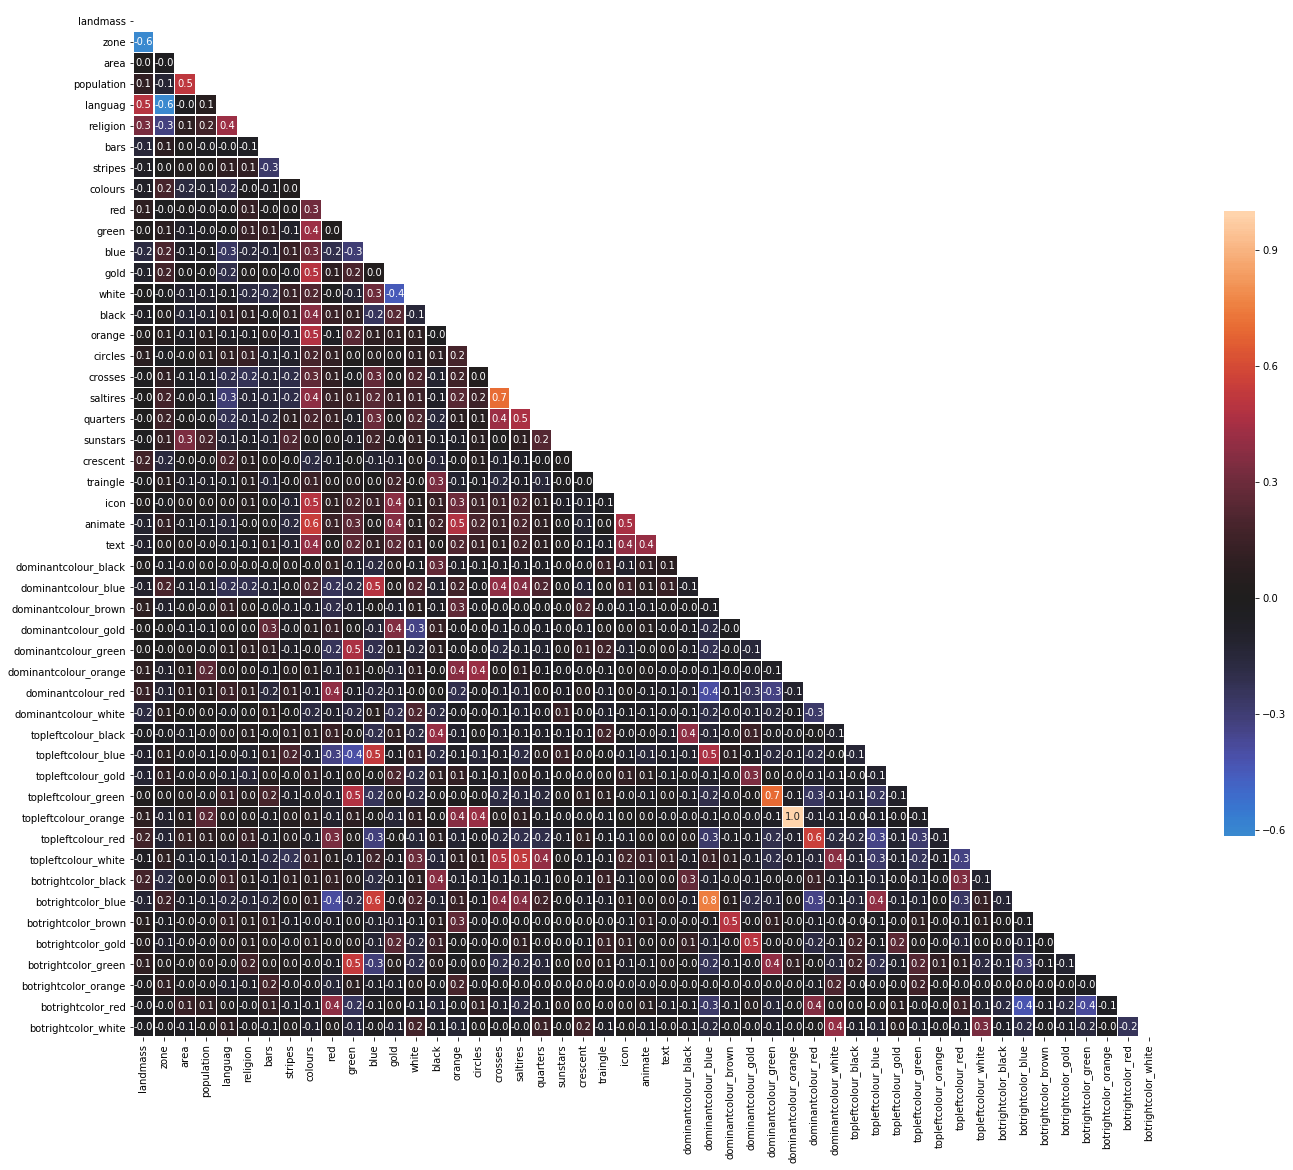

In [116]:
# есть взаимосвязь между цветами элементов флага и доминирующим цветом

plt.figure(figsize=(23,23))
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [117]:
data_pair_plot = data[['religion','landmass', 'zone', 'area','population', 'colours']]

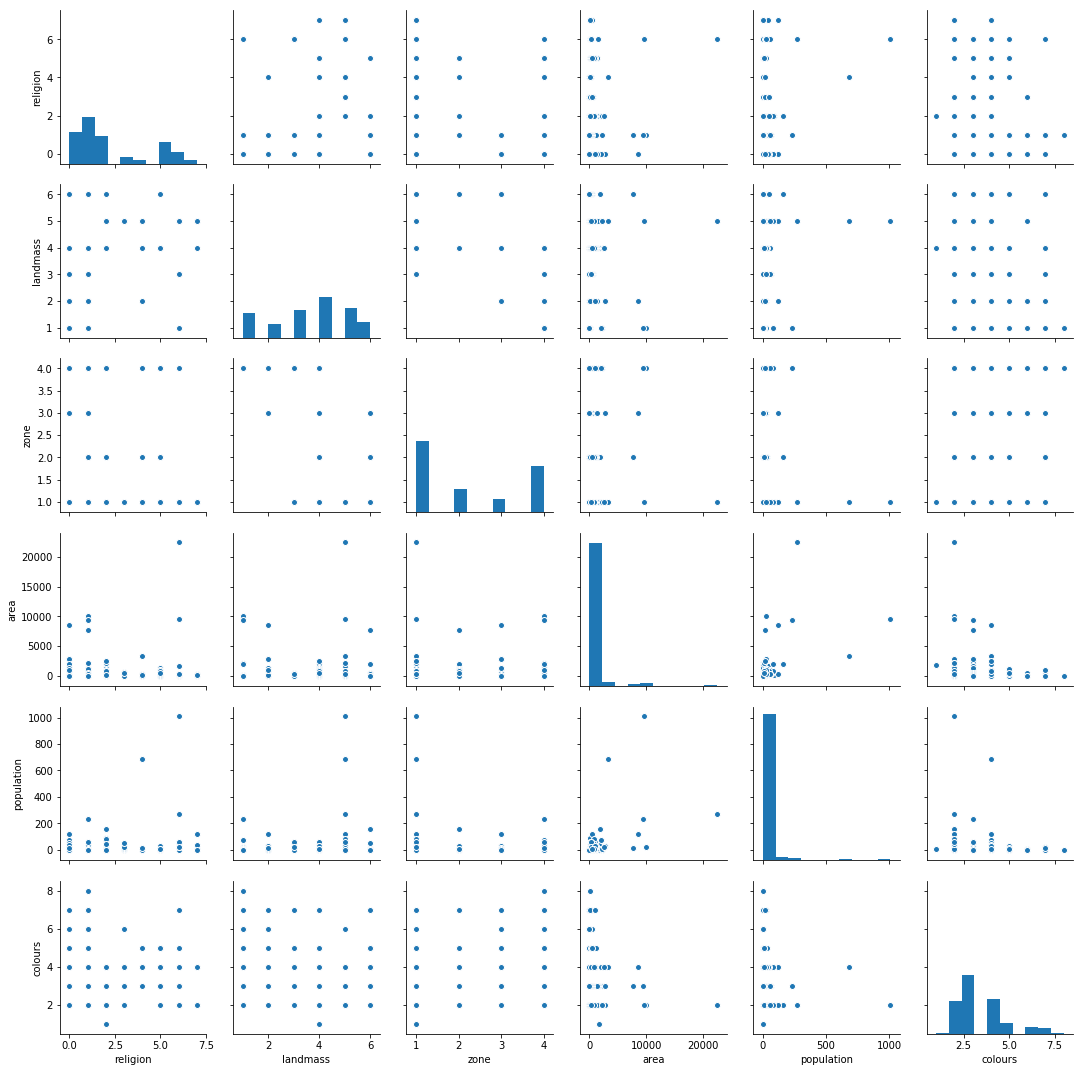

In [118]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data_pair_plot);

5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

In [92]:
# размышления вслух: если попробовать взять доминирующий цвет без цветов элементов, сильно ли это повлияет на результат?
# а так датасет небольшой, нет проблем с обработкой, оставим пока как есть

6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

In [93]:
# мало данных по буддистам,хинди и Others, по-хорошему надо из размножить,но что-то пока усложнять не хочется

7.  Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
X = data.drop('religion', axis = 1)
y = data['religion']

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [122]:
# пронормируем признаки
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNC = KNeighborsClassifier()

clf_KNC.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [137]:
y_pred_test = clf_KNC.predict(X_test)
y_pred_train = clf_KNC.predict(X_train)

In [138]:
clf_KNC.score(X_test, y_test)

0.3103448275862069

In [143]:
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost

In [146]:
xgb = xgboost.XGBClassifier(objective='multi:softmax',)
xgb.fit(X_train, y_train)
xgb.predict
y_train_predict = xgb.predict(X_train)
y_test_predict = xgb.predict(X_test)
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

/Users/olgamonahova/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/olgamonahova/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ValueError: multiclass format is not supported

In [148]:
from sklearn import cross_validation

/Users/olgamonahova/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [150]:
kf = cross_validation.KFold(y_train.shape[0], n_folds=3, shuffle=True)
err = [] # to hold cross val errors
# xgb instance
xgb_model = xgboost.XGBClassifier(objective='multi:softmax')

# cv
for train_index, test_index in kf:
    xgb_model.fit(X_train[train_index], y_train[train_index], eval_metric='mlogloss')
    predictions = xgb_model.predict(X_test[test_index])
    actuals = y_test[test_index]
    err.append(metrics.accuracy_score(actuals, predictions))

/Users/olgamonahova/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: y contains new labels: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]